# Sales Forecast of Retail Clothing Product Categories 

# 1. Business Case

# 2. ML Problem Statement

# 3. Read the Data

# 4. Data Exploration & Visualization without Target

# 5. Data Pre-processing - Regression

# 6. Data Pre-processing - Time Series

# 7. Data Exploration & Visualization with Target

# 8. Model Building - Regression

# 9. Model Building - Time Series

# 10. Validation & Parameter Tuning

# 11. Summary & Conclusion

### Import the libraries

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Business Case

<i>Sales revenue forecast is an educated and calculated guess about how much revenue your company or business will generate in the upcoming period.we will have various advantages by forecasting.
1. Brings in more investors
2. Budgets business expenses
3. Justifies hiring decisions
4. Strategic planning
5. Improves production scheduling
6. Helps to know customers better
7. Contributes to sales and product analysis</i> 

# ML Problem Statement

<i>Sales forecast can be converted to a Machine learning problem by building a ML model based on the available weather data, 
event/holidays data, macro economic data and calculating the impact these variables will have on the target which is 
Sales(InThousandDollars)</i>


<i>Model can be built and trained on the data available from 2009 to 2015 and finally we can predict the sales on the year 2016 using the model.</i>

#  Read the data 

#### Train data

In [174]:
#### Train data
train_data = pd.read_csv("Train.csv")
train_data.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


#### Weather data

In [175]:
#### Weather data 
weather_data = pd.read_excel("WeatherDataNew-1549298254132.xlsx",na_values='-') 
weather_data.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0,NaN
1,2009,Jan,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,T,Snow
2,2009,Jan,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,T,NaN
3,2009,Jan,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0,NaN
4,2009,Jan,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,T,NaN


#### Economics data

In [176]:
#### Economics data
economics_data = pd.read_excel("MacroEconomicData.xlsx",na_values='?')
economics_data.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


#### Holidays data

In [177]:
#### Holidays data
holidays_data = pd.read_excel("Events_HolidaysData.xlsx")
holidays_data.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


# Data Exploration & Visualizations without Target

#### Train data

In [178]:
train_data.shape

(252, 4)

There are 252 records and 4 columns in the train data

In [179]:
# Check the datatypes of the columns 
train_data.dtypes

Year                           int64
Month                          int64
ProductCategory               object
Sales(In ThousandDollars)    float64
dtype: object

Summary Statistics

In [151]:
train_data.describe()

,Year,Month,Sales(In ThousandDollars)
count,252.00000,252.000000,239.000000
mean,2012.00000,6.500000,1746.602510
std,2.00398,3.458922,1300.395559
min,2009.00000,1.000000,471.000000
25%,2010.00000,3.750000,714.000000
50%,2012.00000,6.500000,1136.000000
75%,2014.00000,9.250000,2803.500000
max,2015.00000,12.000000,5874.000000


#### Total Sales(in ThousandDollars) vs Year 

In [180]:
agg_sales_yearly = train_data.groupby(['Year'],as_index=False).sum()
agg_sales_yearly

,Year,Month,Sales(In ThousandDollars)
0,2009,234,47509.0
1,2010,234,50350.0
2,2011,234,54462.0
3,2012,234,57269.0
4,2013,234,65254.0
5,2014,234,72436.0
6,2015,234,70158.0


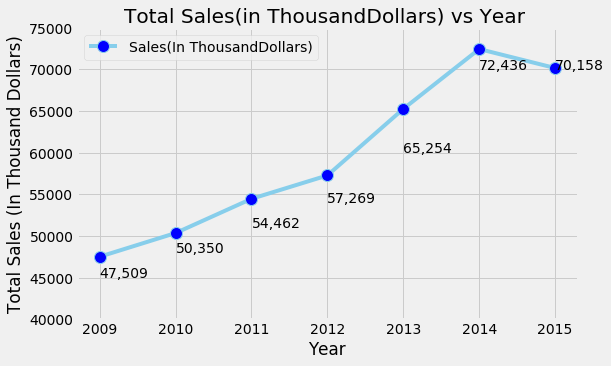

In [181]:
fig, axes = plt.subplots(figsize=(8,5))

y_range = np.arange(40000,80000,5000)

plt.text(2009,45000,"47,509")
plt.text(2010,48000,"50,350")
plt.text(2011,51000,"54,462")
plt.text(2012,54000,"57,269")
plt.text(2013,60000,"65,254")
plt.text(2014,70000,"72,436")
plt.text(2015,70000,"70,158")

plt.plot(agg_sales_yearly['Year'],agg_sales_yearly['Sales(In ThousandDollars)'],marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

axes.set_xlabel('Year', color = 'black')
axes.set_ylabel('Total Sales (In Thousand Dollars)', color = 'black')
axes.set_title('Total Sales(in ThousandDollars) vs Year ', color = 'black')
axes.set_yticks(y_range)
axes.grid(True)
plt.legend()


The slump in the sales revenue in 2015 is because we have a missing value in 2015 in Women category 

#### Total Sales vs Product Category

In [60]:
agg_sales_category = train_data.groupby(['ProductCategory'],as_index=False).sum()
agg_sales_category

,ProductCategory,Year,Month,Sales(In ThousandDollars)
0,MenClothing,169008,546,54316.0
1,OtherClothing,169008,546,90337.0
2,WomenClothing,169008,546,272785.0


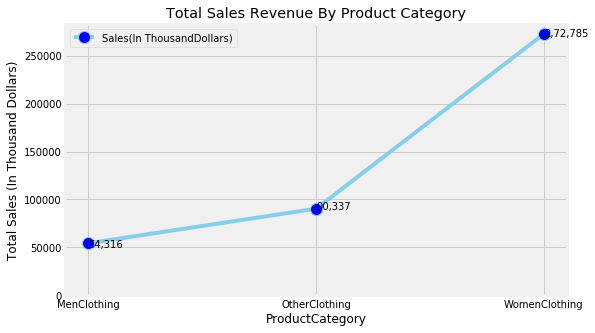

In [61]:
fig, axes = plt.subplots(figsize=(8,5))

y_range = np.arange(0,300000,50000)

plt.text('MenClothing',50000,"54,316")
plt.text('OtherClothing', 90000,"90,337")
plt.text('WomenClothing', 270000,"2,72,785")

plt.plot(agg_sales_category['ProductCategory'],agg_sales_category['Sales(In ThousandDollars)'],marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

axes.set_xlabel('ProductCategory', color = 'black')
axes.set_ylabel('Total Sales (In Thousand Dollars)', color = 'black')
axes.set_title('Total Sales Revenue By Product Category', color = 'black')
axes.set_yticks(y_range)
axes.grid(True)
plt.legend()



Its intuitive that generally women clothing will have more revenue and the graph also depicts the same 

#### Product Category wise sales per Year

In [62]:
agg_category_yearly = train_data.groupby(['Year','ProductCategory'])['Sales(In ThousandDollars)'].sum().unstack().reset_index()
agg_category_yearly.head()


ProductCategory,Year,MenClothing,OtherClothing,WomenClothing
0,2009,7353.0,11356.0,28800.0
1,2010,6768.0,10766.0,32816.0
2,2011,7199.0,11601.0,35662.0
3,2012,7653.0,12867.0,36749.0
4,2013,8670.0,13424.0,43160.0


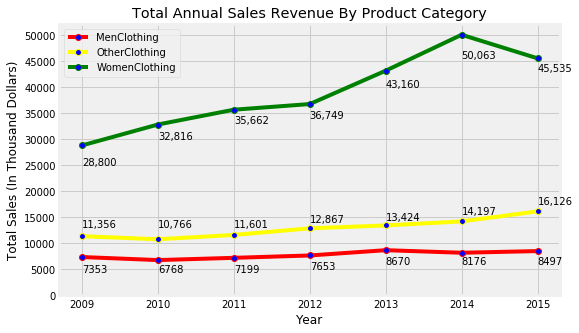

In [63]:
fig, axes = plt.subplots(figsize=(8,5))

y_range = np.arange(0,55000,5000)

plt.text(2009, 4500,"7353")
plt.text(2009, 13000,"11,356")
plt.text(2009, 25000,"28,800")
plt.text(2010, 4500,"6768")
plt.text(2010, 13000,"10,766")
plt.text(2010, 30000,"32,816")
plt.text(2011, 4500,"7199")
plt.text(2011, 13000,"11,601")
plt.text(2011, 33000,"35,662")
plt.text(2012, 5000,"7653")
plt.text(2012, 14000,"12,867")
plt.text(2012, 34000,"36,749")
plt.text(2013, 6000,"8670")
plt.text(2013, 14500,"13,424")
plt.text(2013, 40000,"43,160")
plt.text(2014, 6000,"8176")
plt.text(2014, 15500,"14,197")
plt.text(2014, 45500,"50,063")
plt.text(2015, 6000,"8497")
plt.text(2015, 17500,"16,126")
plt.text(2015, 43000,"45,535")

axes.plot(agg_category_yearly['Year'], agg_category_yearly['MenClothing'], 'red', marker='o', markerfacecolor = 'blue')
axes.plot(agg_category_yearly['Year'], agg_category_yearly['OtherClothing'], 'yellow', marker='o', markerfacecolor = 'blue')
axes.plot(agg_category_yearly['Year'], agg_category_yearly['WomenClothing'], 'green', marker='o', markerfacecolor = 'blue')


axes.set_xlabel('Year', color = 'black')
axes.set_ylabel('Total Sales (In Thousand Dollars)', color = 'black')
axes.set_title('Total Annual Sales Revenue By Product Category', color = 'black')
axes.set_yticks(y_range)
axes.grid(True)
plt.legend()


We can infer that Men clothing has the least revenue whereas women clothing has the highest revenue.
Also, revenue from Men clothing ad women clothing has increased slowly without any substantial rise and infact decreased in one year.
But, revenue from Women clothing has grown at the rate of more than 10% Year-on-Year except in one year.
Revenue from Women clothing is almost four times of Men clothing and three times of Other clothing.

#### Check for missing values

In [8]:
train_data.isnull().sum(axis=0)

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

There are 13 null values in sales column which will be handled later

####  Weather data

In [183]:
weather_data.shape

(2922, 23)

There are 2922 records and 23 columns in the data

In [184]:
weather_data.dtypes

Year                             int64
Month                           object
Day                              int64
Temp high (°C)                 float64
Temp avg (°C)                  float64
Temp low (°C)                  float64
Dew Point high (°C)            float64
Dew Point avg (°C)             float64
Dew Point low (°C)             float64
Humidity (%) high              float64
Humidity (%) avg               float64
Humidity (%) low               float64
Sea Level Press. (hPa) high    float64
Sea Level Press. (hPa) avg     float64
Sea Level Press. (hPa) low     float64
Visibility (km) high           float64
Visibility (km) avg            float64
Visibility (km) low            float64
Wind (km/h) low                float64
Wind (km/h) avg                float64
Wind (km/h) high               float64
Precip. (mm) sum                object
WeatherEvent                    object
dtype: object

Summary Statistics

In [185]:
weather_data.describe()

,Year,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high
count,2922.000000,2922.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2903.000000,2903.000000,2903.000000,2894.000000,2894.000000,2894.000000,2902.000000,2902.000000,2863.000000
mean,2012.501027,15.729637,17.371918,13.530137,9.429452,8.503767,5.366096,1.854110,77.907192,61.460616,44.522945,1019.838099,1016.218739,1012.660007,15.895646,13.909468,10.449896,23.061682,9.092695,36.004191
std,2.291829,8.801598,10.230641,9.662644,9.322538,10.045084,10.509162,10.993565,15.637223,14.433762,15.827029,7.054331,7.429849,7.980106,0.618441,3.157808,6.142232,7.262782,4.883618,10.772405
min,2009.000000,1.000000,-9.000000,-14.000000,-18.000000,-24.000000,-27.000000,-28.000000,28.000000,20.000000,9.000000,994.000000,980.000000,966.000000,8.000000,1.000000,0.000000,6.000000,0.000000,11.000000
25%,2011.000000,8.000000,9.000000,6.000000,2.000000,1.000000,-3.000000,-7.000000,65.000000,51.000000,33.000000,1015.000000,1012.000000,1008.000000,16.000000,13.000000,3.000000,19.000000,6.000000,27.000000
50%,2012.500000,16.000000,18.000000,14.000000,10.000000,10.000000,6.000000,2.000000,79.000000,61.000000,42.000000,1020.000000,1016.000000,1013.000000,16.000000,16.000000,14.000000,23.000000,8.000000,35.000000
75%,2014.750000,23.000000,26.000000,22.000000,18.000000,17.000000,14.000000,11.000000,93.000000,72.000000,54.000000,1024.000000,1021.000000,1018.000000,16.000000,16.000000,16.000000,26.000000,11.000000,42.000000
max,2016.000000,31.000000,40.000000,34.000000,29.000000,26.000000,24.000000,22.000000,100.000000,97.000000,93.000000,1044.000000,1041.000000,1037.000000,16.000000,16.000000,16.000000,159.000000,159.000000,159.000000


#### Heat Map -Weather data - Correlation plot

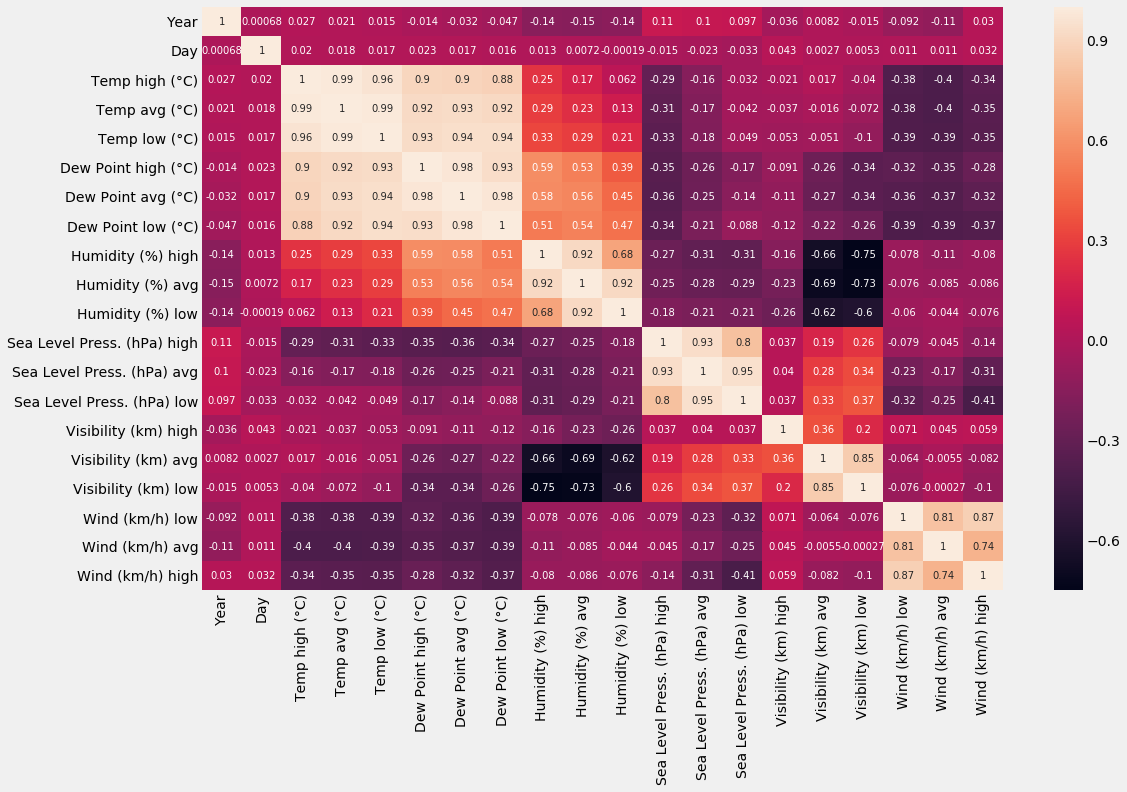

In [186]:
plt.figure(figsize=(16,10))
sns.heatmap(weather_data.corr(), annot=True,annot_kws={"size":10})
plt.show()

Insights from the correlation plot -
1. High correlation between all the high , low and avg values and since avg values gives us the same information all the 
   high value and low value columns can be dropped.
2. Temp Avg and Dew point Avg are highly correlated, anyone of the column can be dropped


#### Check for missing values

In [187]:
weather_data.isnull().sum(axis=0)

Year                              0
Month                             0
Day                               0
Temp high (°C)                    2
Temp avg (°C)                     2
Temp low (°C)                     2
Dew Point high (°C)               2
Dew Point avg (°C)                2
Dew Point low (°C)                2
Humidity (%) high                 2
Humidity (%) avg                  2
Humidity (%) low                  2
Sea Level Press. (hPa) high      19
Sea Level Press. (hPa) avg       19
Sea Level Press. (hPa) low       19
Visibility (km) high             28
Visibility (km) avg              28
Visibility (km) low              28
Wind (km/h) low                  20
Wind (km/h) avg                  20
Wind (km/h) high                 59
Precip. (mm) sum                  1
WeatherEvent                   1908
dtype: int64

we have huge missing values in the WeatherEvent column which will be handled later but these are not missing values but NA values which specify that there is no weather event on that day.

#### Economics data

In [188]:
economics_data.shape

(96, 18)

There are 96 records and 18 columns in the data

In [189]:
economics_data.describe()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,11.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,16490.078125,15548.932194,252.372552,7.442708,12.519479,10.447604,23.793229,185.727273,91.034479,0.615521,10.647698,8.851885,791.843750,14.616010,3.556104,11.061615
std,1427.554038,773.076316,9.290857,1.766397,0.722375,0.560651,1.147167,39.754474,33.613974,6.919387,1.728418,1.102847,25.753621,2.007579,0.158263,1.710573
min,14317.372922,14345.676097,233.402000,4.600000,11.820000,9.450000,21.960000,116.000000,51.500000,-23.590000,8.398000,7.345000,747.000000,11.751000,3.275000,8.500000
25%,15210.701514,14919.668252,242.474500,5.675000,11.950000,10.030000,22.797500,157.500000,70.377500,-2.400000,9.296000,7.586000,772.750000,12.551000,3.410000,9.742500
50%,16422.454368,15442.996869,254.680500,7.750000,12.220000,10.470000,23.800000,200.000000,83.905000,0.350000,10.260500,9.156500,790.000000,14.959000,3.572500,10.637500
75%,17772.032416,16262.237629,260.381500,9.000000,13.057500,10.940000,24.772500,211.000000,93.322500,3.482500,11.412250,9.654500,807.000000,16.250000,3.675000,11.493750
max,19015.393408,16918.050624,265.421000,10.000000,14.260000,11.440000,26.040000,248.000000,229.670000,22.850000,14.431000,10.577000,869.000000,18.375000,4.170000,15.280000


#### Heat Map - Economics Data - Correlation plot

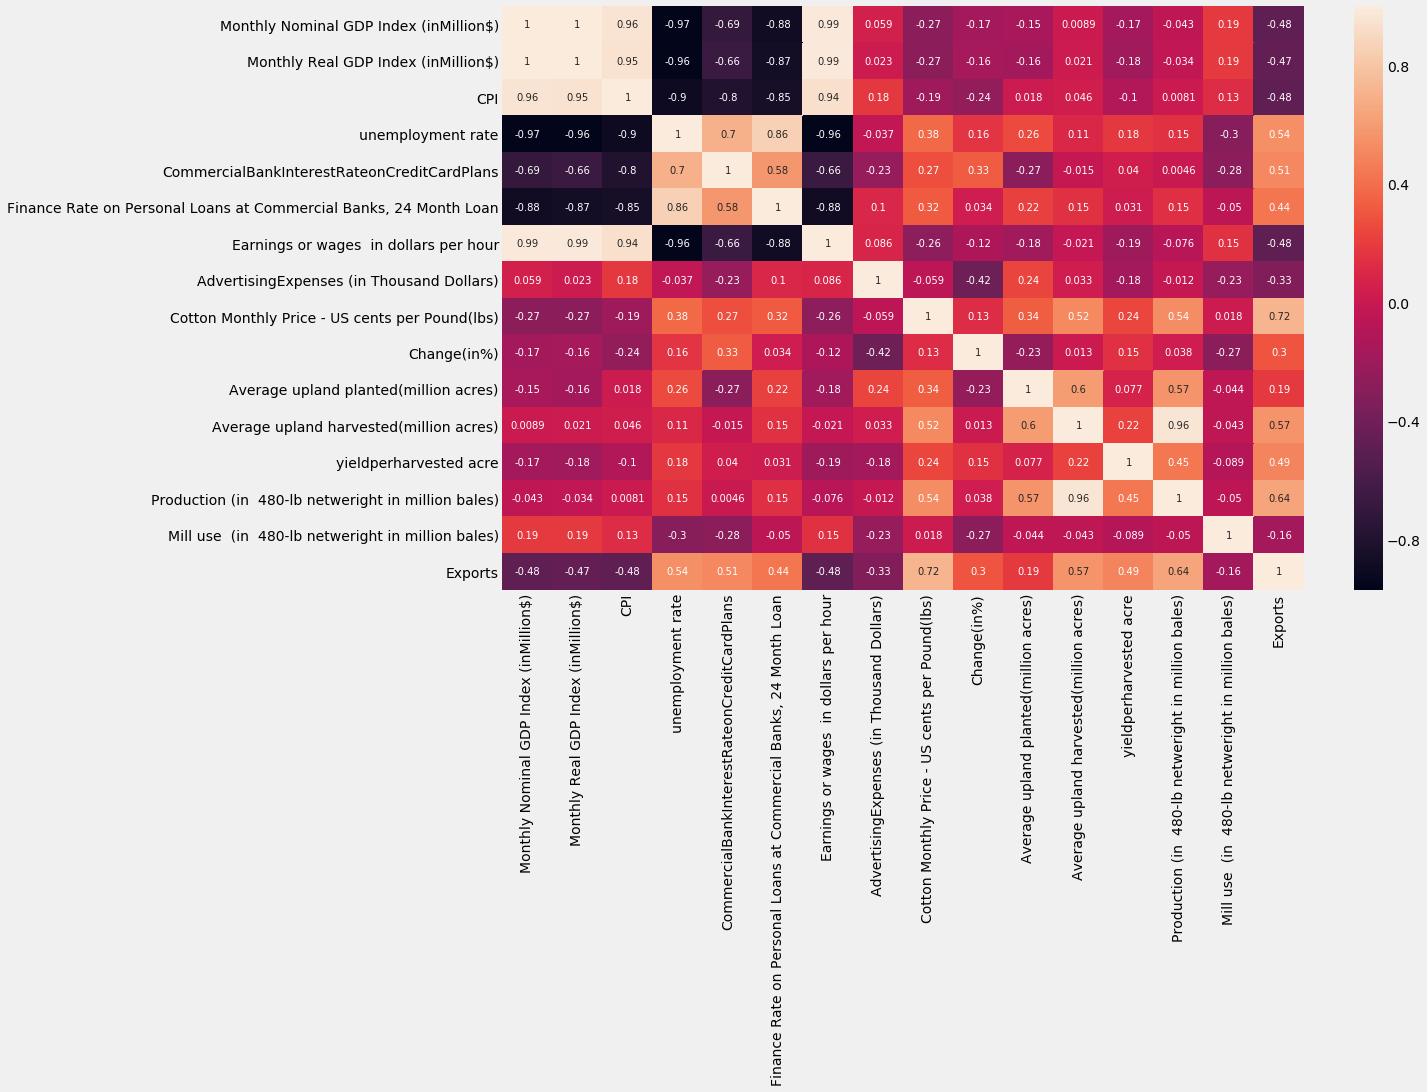

In [190]:
plt.figure(figsize=(16,10))
sns.heatmap(economics_data.corr(), annot=True,annot_kws={"size":10})
plt.show()

Insights from the plot

 - Monthly Nominal GDP Index, Monthly Real GDP are 100% correlated , anyone of the column can be dropped
 - Average upland harvested(million acres) and Production (in  480-lb netweright in million bales) are highly correlated
 - Unemployment rate is highly correlated with Earnings or wages  in dollars per hour

Monthly Real GDP index vs CPI

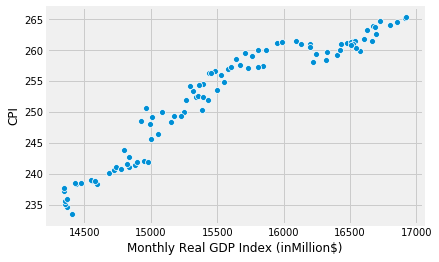

In [71]:
sns.scatterplot(x=economics_data["Monthly Real GDP Index (inMillion$)"],y=economics_data["CPI"])


Unemployent rate is highly negatively correlated with Monthly Real GDP Index (inMillion$) and CPI

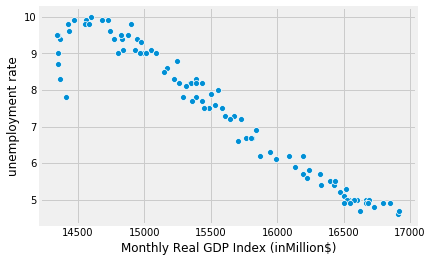

In [72]:
sns.scatterplot(x=economics_data["Monthly Real GDP Index (inMillion$)"],y=economics_data["unemployment rate"])

CPI vs Unemployment rate

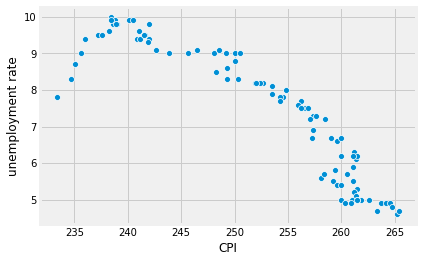

In [73]:
sns.scatterplot(x=economics_data["CPI"],y=economics_data["unemployment rate"])

Monthly Real GDP Index (inMillion$) vs Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan

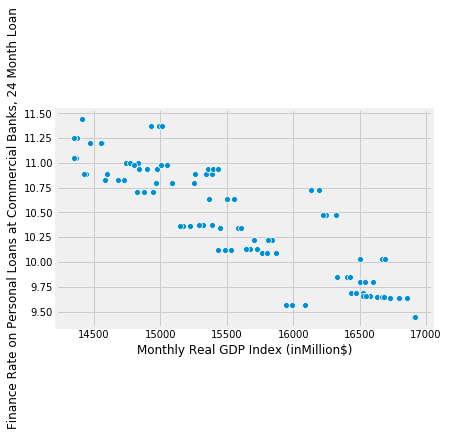

In [74]:
sns.scatterplot(x=economics_data["Monthly Real GDP Index (inMillion$)"],y=economics_data["Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan"])


Unemployment rate vs Earnings or wages  in dollars per hour

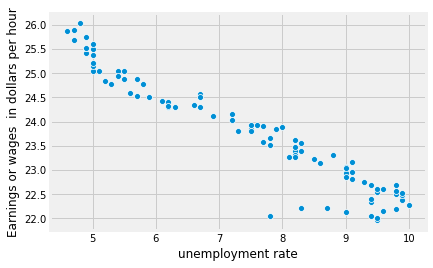

In [75]:
sns.scatterplot(x=economics_data["unemployment rate"],y=economics_data["Earnings or wages  in dollars per hour"])


Earnings or wages in dollars per hour is vs Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan

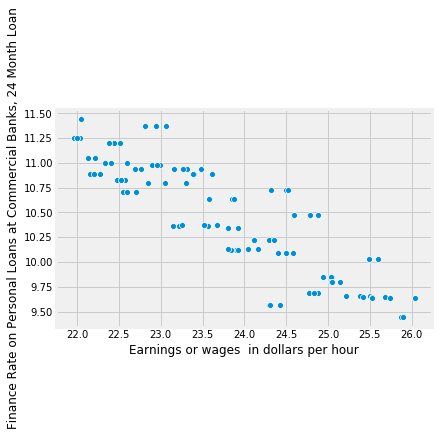

In [76]:
sns.scatterplot(x=economics_data["Earnings or wages  in dollars per hour"],y=economics_data["Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan"])


#### 4. Holidays Data

In [195]:
holidays_data.shape

(150, 4)

There are 150 records and 4 columns in the holidays data

In [196]:
holidays_data.dtypes

Year                    int64
MonthDate      datetime64[ns]
Event                  object
DayCategory            object
dtype: object

Summary Statistics

In [197]:
holidays_data.describe()

,Year
count,150.000000
mean,2012.540000
std,2.324743
min,2009.000000
25%,2010.250000
50%,2012.500000
75%,2015.000000
max,2016.000000


# Data Preprocessing - Regression

#### Train data

Split the train data three subsets based on the product category

In [198]:
train_women_data = train_data.loc[train_data['ProductCategory'] == 'WomenClothing' , :]
train_men_data   = train_data.loc[train_data['ProductCategory'] == 'MenClothing' , :]
train_other_data = train_data.loc[train_data['ProductCategory'] == 'OtherClothing' , :]

In [199]:
print(train_men_data.shape)
print(train_women_data.shape)
print(train_other_data.shape)

(84, 4)
(84, 4)
(84, 4)


#### Weather  Data

We have avg values columns for Temp, Dew Point, Humidity , Sea Level Press. , Visibility and Wind along with the 
high and low values of each of these columns 
So, we can drop these columns as the avg value columns give the same details

In [200]:
cols_drop = ['Temp high (°C)','Temp low (°C)','Dew Point high (°C)','Dew Point low (°C)','Humidity (%) high',
             'Humidity (%) low','Sea Level Press. (hPa) high','Sea Level Press. (hPa) low',
             'Visibility (km) high','Visibility (km) low','Wind (km/h) high','Wind (km/h) low']


In [201]:
weather_data.drop(cols_drop,axis=1, inplace=True)

Precipitation 'T' refers that the value is less than 0.01 , so replace all T values in the precipitation column with 0.01

In [202]:
weather_data.loc[weather_data['Precip. (mm) sum'] == 'T', 'Precip. (mm) sum'] = 0.01

Convert the column into appropriate datatype

In [203]:
weather_data['Precip. (mm) sum'] = weather_data['Precip. (mm) sum'].astype('float64')

In [204]:
weather_data.head() ### Check if the Precipitation 'T' has been replaced with 0.01

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-6.0,-17.0,43.0,1023.0,16.0,18.0,0.00,NaN
1,2009,Jan,2,-2.0,-7.0,57.0,1012.0,13.0,10.0,0.01,Snow
2,2009,Jan,3,1.0,-9.0,54.0,1015.0,16.0,16.0,0.01,NaN
3,2009,Jan,4,1.0,-12.0,42.0,1017.0,16.0,12.0,0.00,NaN
4,2009,Jan,5,5.0,-5.0,48.0,1014.0,16.0,11.0,0.01,NaN


Split the dataframe into Categorical and Numerical columns to be grouped by Year and Month

In [205]:
weather_cat_vars = ['Year','Month','WeatherEvent']

weather_num_vars = ['Year','Month','Day','Temp avg (°C)','Dew Point avg (°C)','Humidity (%) avg','Sea Level Press. (hPa) avg',
                    'Visibility (km) avg','Wind (km/h) avg','Precip. (mm) sum']

In [206]:
weather_data_cat = weather_data[weather_cat_vars]

weather_data_num = weather_data[weather_num_vars]

Average the values for each month against each day available currently for numerical data

In [207]:
agg_weather_num = weather_data_num.groupby(['Year','Month'],as_index=False).mean()
agg_weather_num.shape

(96, 10)

In [208]:
agg_weather_num.head(12) ##### first year data after grouping by Year and Month

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum
0,2009,Apr,15.5,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667
1,2009,Aug,16.0,24.387097,18.483871,72.483871,1015.967742,14.483871,6.806452,3.466774
2,2009,Dec,16.0,2.354839,-4.677419,61.741935,1017.225806,13.774194,13.451613,5.957097
3,2009,Feb,14.5,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071
4,2009,Jan,16.0,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226
5,2009,Jul,16.0,22.741935,16.451613,70.806452,1013.580645,12.935484,7.903226,5.825806
6,2009,Jun,15.5,19.866667,15.366667,78.866667,1011.166667,11.833333,7.379310,8.518333
7,2009,Mar,16.0,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194
8,2009,May,16.0,17.000000,10.096774,68.516129,1017.161290,12.451613,8.000000,4.236129
9,2009,Nov,15.5,10.800000,4.166667,66.600000,1019.033333,14.666667,11.133333,1.364333


Get the count of weather events grouped by Year and Month

In [209]:
agg_weather_cat = weather_data_cat.groupby(['Year','Month']).count()
agg_weather_cat.head(12)  ##### first year data after grouping by Year and Month

WeatherEvent
Year Month              
2009 Apr              12
     Aug              13
     Dec              11
     Feb               6
     Jan              10
     Jul              13
     Jun              20
     Mar              10
     May              14
     Nov              10
     Oct              14
     Sep               7

Merge the aggregated categorical data and aggregated numerical data

In [210]:
weather_data_final = agg_weather_num.merge(agg_weather_cat,how='inner',on = ['Year','Month'])
weather_data_final.shape

(96, 11)

In [211]:
weather_data_final.head(12)

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
0,2009,Apr,15.5,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,12
1,2009,Aug,16.0,24.387097,18.483871,72.483871,1015.967742,14.483871,6.806452,3.466774,13
2,2009,Dec,16.0,2.354839,-4.677419,61.741935,1017.225806,13.774194,13.451613,5.957097,11
3,2009,Feb,14.5,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,6
4,2009,Jan,16.0,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,10
5,2009,Jul,16.0,22.741935,16.451613,70.806452,1013.580645,12.935484,7.903226,5.825806,13
6,2009,Jun,15.5,19.866667,15.366667,78.866667,1011.166667,11.833333,7.379310,8.518333,20
7,2009,Mar,16.0,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,10
8,2009,May,16.0,17.000000,10.096774,68.516129,1017.161290,12.451613,8.000000,4.236129,14
9,2009,Nov,15.5,10.800000,4.166667,66.600000,1019.033333,14.666667,11.133333,1.364333,10


Now, the weather event column has the count of weather events in the month

Day column can  be dropped 

In [212]:
weather_data_final.drop(['Day'],axis=1,inplace=True)

In [213]:
weather_data_final.shape

(96, 10)

In [214]:
weather_data_final.head()

,Year,Month,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
0,2009,Apr,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,12
1,2009,Aug,24.387097,18.483871,72.483871,1015.967742,14.483871,6.806452,3.466774,13
2,2009,Dec,2.354839,-4.677419,61.741935,1017.225806,13.774194,13.451613,5.957097,11
3,2009,Feb,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,6
4,2009,Jan,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,10


Convert the Month to corresponding Integer

In [215]:
weather_data_final['Month'] = pd.to_datetime(weather_data_final['Month'],format='%b')

weather_data_final['Month'] = weather_data_final['Month'].dt.month

In [216]:
weather_data_final.head()

,Year,Month,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
0,2009,4,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,12
1,2009,8,24.387097,18.483871,72.483871,1015.967742,14.483871,6.806452,3.466774,13
2,2009,12,2.354839,-4.677419,61.741935,1017.225806,13.774194,13.451613,5.957097,11
3,2009,2,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,6
4,2009,1,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,10


Sort the data by the combination of Year and Month in ascending order

In [217]:
weather_data_final = weather_data_final.sort_values(by=['Year','Month'])
weather_data_final.head(12)

,Year,Month,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
4,2009,1,-2.096774,-9.903226,57.354839,1015.967742,14.000000,12.000000,2.443226,10
3,2009,2,2.785714,-6.392857,54.000000,1017.071429,15.178571,12.214286,0.781071,6
7,2009,3,5.967742,-2.903226,57.064516,1021.064516,14.258065,11.387097,1.434194,10
0,2009,4,12.733333,2.533333,55.700000,1014.533333,14.066667,11.366667,3.971667,12
8,2009,5,17.000000,10.096774,68.516129,1017.161290,12.451613,8.000000,4.236129,14
6,2009,6,19.866667,15.366667,78.866667,1011.166667,11.833333,7.379310,8.518333,20
5,2009,7,22.741935,16.451613,70.806452,1013.580645,12.935484,7.903226,5.825806,13
1,2009,8,24.387097,18.483871,72.483871,1015.967742,14.483871,6.806452,3.466774,13
11,2009,9,19.233333,12.766667,69.700000,1018.700000,15.033333,9.266667,1.913667,7
10,2009,10,12.870968,7.032258,69.354839,1016.774194,14.064516,9.677419,4.572581,14


In [218]:
weather_data_final.isnull().sum(axis=0)

Year                          0
Month                         0
Temp avg (°C)                 0
Dew Point avg (°C)            0
Humidity (%) avg              0
Sea Level Press. (hPa) avg    0
Visibility (km) avg           0
Wind (km/h) avg               0
Precip. (mm) sum              0
WeatherEvent                  0
dtype: int64

In [219]:
weather_data_final.drop('Dew Point avg (°C)',axis=1,inplace=True)

In [220]:
weather_data_final.head()

,Year,Month,Temp avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent
4,2009,1,-2.096774,57.354839,1015.967742,14.000000,12.000000,2.443226,10
3,2009,2,2.785714,54.000000,1017.071429,15.178571,12.214286,0.781071,6
7,2009,3,5.967742,57.064516,1021.064516,14.258065,11.387097,1.434194,10
0,2009,4,12.733333,55.700000,1014.533333,14.066667,11.366667,3.971667,12
8,2009,5,17.000000,68.516129,1017.161290,12.451613,8.000000,4.236129,14


#### Economics data

Check for null values

In [221]:
economics_data.isnull().sum(axis=0)

Year-Month                                                            0
Monthly Nominal GDP Index (inMillion$)                                0
Monthly Real GDP Index (inMillion$)                                   0
CPI                                                                   0
PartyInPower                                                          0
unemployment rate                                                     0
CommercialBankInterestRateonCreditCardPlans                           0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     0
Earnings or wages  in dollars per hour                                0
AdvertisingExpenses (in Thousand Dollars)                            85
Cotton Monthly Price - US cents per Pound(lbs)                        0
Change(in%)                                                           0
Average upland planted(million acres)                                 0
Average upland harvested(million acres)                         

There are 85 null values in the AdvertisingExpenses column out of 96 records.
So this can be dropped.

In [222]:
economics_data.drop('AdvertisingExpenses (in Thousand Dollars)', axis=1, inplace=True)

All the records of 'PartyInPower' column have same value, hence it can be dropped 

In [223]:
economics_data.drop('PartyInPower', axis=1, inplace=True)

In [224]:
### Check for the shape after deleting the columns
economics_data.shape

(96, 16)

Now , we have only 16 columns in the data against 18 before dropping the columns

Split the Year-Month column to Year and Month,
Drop the unnecessary Year-Month after the split

In [225]:
# new data frame with split value columns 
new = economics_data['Year-Month'].str.split("-", n = 2, expand = True) 
  
# making seperate first name column from new data frame 
economics_data['Year']= new[0] 
  
# making seperate last name column from new data frame 
economics_data['Month']= new[1] 
  
# Dropping old Name columns 
economics_data.drop('Year-Month',axis =1, inplace = True) 
  

In [226]:
economics_data.head() ###check the data after split

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,Jan
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,Feb
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,Mar
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,Apr
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,May


Convert the Month column to corresponding numeric value

In [227]:
economics_data['Month'] = pd.to_datetime(economics_data['Month'],format=' %b')

economics_data['Month'] = economics_data['Month'].dt.month

In [228]:
economics_data.head() # check the data after conversion

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


Convert Year column to appropriate datatype 

In [229]:
economics_data['Year'] = economics_data['Year'].astype('int64')

In [230]:
economics_data.dtypes

Monthly Nominal GDP Index (inMillion$)                               float64
Monthly Real GDP Index (inMillion$)                                  float64
CPI                                                                  float64
unemployment rate                                                    float64
CommercialBankInterestRateonCreditCardPlans                          float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    float64
Earnings or wages  in dollars per hour                               float64
Cotton Monthly Price - US cents per Pound(lbs)                       float64
Change(in%)                                                          float64
Average upland planted(million acres)                                float64
Average upland harvested(million acres)                              float64
yieldperharvested acre                                                 int64
Production (in  480-lb netweright in million bales)                  float64

Drop values which have high correlation with the eisting columns

In [231]:
economics_data.drop('Monthly Nominal GDP Index (inMillion$)',axis=1,inplace=True)
economics_data.drop('Production (in  480-lb netweright in million bales)',axis=1,inplace=True)

#### Holidays Data

Check for missing values

In [232]:
holidays_data.isnull().sum(axis=0)

Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64

There are no missing values in the data

Convert the Month to the corresponding Numeric

In [233]:
holidays_data['Month'] = holidays_data['MonthDate'].dt.month
holidays_data.dtypes

Year                    int64
MonthDate      datetime64[ns]
Event                  object
DayCategory            object
Month                   int64
dtype: object

In [234]:
holidays_data.head()

,Year,MonthDate,Event,DayCategory,Month
0,2009,2001-01-01,New Year's Day,Federal Holiday,1
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday,1
2,2009,2014-02-01,Valentine's Day,Event,2
3,2009,2016-02-01,Presidents' Day,Federal Holiday,2
4,2009,2012-04-01,Easter Sunday,Event,4


Now that we dont need the MonthDate Column , drop that

In [235]:
# Dropping old Name columns 
holidays_data.drop('MonthDate',axis=1, inplace = True) 
  

In [236]:
holidays_data.head()

,Year,Event,DayCategory,Month
0,2009,New Year's Day,Federal Holiday,1
1,2009,Martin Luther King Jr. Day,Federal Holiday,1
2,2009,Valentine's Day,Event,2
3,2009,Presidents' Day,Federal Holiday,2
4,2009,Easter Sunday,Event,4


'Event' Column can be dropped as it doesnt provide any insights

In [237]:
holidays_data.drop('Event',axis = 1,inplace=True)

In [238]:
holidays_data.head()

,Year,DayCategory,Month
0,2009,Federal Holiday,1
1,2009,Federal Holiday,1
2,2009,Event,2
3,2009,Federal Holiday,2
4,2009,Event,4


Get the count of DayCategory by Month

In [239]:
holidays_data_final = holidays_data.groupby(['Year','Month'],as_index=False).count()
holidays_data_final.head(12)  ##### first year data after grouping by Year and Month


,Year,Month,DayCategory
0,2009,1,2
1,2009,2,2
2,2009,4,1
3,2009,5,2
4,2009,6,1
5,2009,7,2
6,2009,9,1
7,2009,10,2
8,2009,11,2
9,2009,12,3


Now, Daycategory column has the count of holidays in the month

#### Merge weather ,economics and holidays 

In [240]:
merged_data = weather_data_final.merge(economics_data,how='outer',on=['Year','Month']).merge(holidays_data_final,how ='outer',on=['Year','Month'])
merged_data.shape

(96, 23)

#### Merge the women category data & all other merged data for Regression

In [241]:
sales_women_reg = merged_data.merge(train_women_data,how='outer',on=['Year','Month'])

In [242]:
print(sales_women_reg.shape)

(96, 25)


In [243]:
sales_women_reg.head()

,Year,Month,Temp avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent,Monthly Real GDP Index (inMillion$),...,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports,DayCategory,ProductCategory,Sales(In ThousandDollars)
0,2009,1,-2.096774,57.354839,1015.967742,14.000000,12.000000,2.443226,10,14407.053343,...,57.70,4.02,9.296,7.559,799,4.17,11.550,2.0,WomenClothing,1755.0
1,2009,2,2.785714,54.000000,1017.071429,15.178571,12.214286,0.781071,6,14366.176571,...,55.21,-4.32,9.296,7.559,799,3.87,11.100,2.0,WomenClothing,1729.0
2,2009,3,5.967742,57.064516,1021.064516,14.258065,11.387097,1.434194,10,14351.786822,...,51.50,-6.72,9.296,7.559,799,3.72,11.650,NaN,WomenClothing,2256.0
3,2009,4,12.733333,55.700000,1014.533333,14.066667,11.366667,3.971667,12,14351.601731,...,56.78,10.25,9.296,7.559,787,3.62,12.225,1.0,WomenClothing,2662.0
4,2009,5,17.000000,68.516129,1017.161290,12.451613,8.000000,4.236129,14,14368.123959,...,61.95,9.11,9.297,7.400,803,3.52,12.300,2.0,WomenClothing,2732.0


Product category can be dropped as it is same for all the records

In [244]:
sales_women_reg.drop('ProductCategory',axis=1,inplace=True)

In the DayCategory null means the count is zero, hence we can fill with zero

In [245]:
sales_women_reg['DayCategory'].fillna(0, inplace=True)

subset all the data from 2009 till 2015 

In [246]:
sales_women_reg_2015  = sales_women_reg[sales_women_reg['Year'] != 2016 ]
sales_women_reg_2015.shape

(84, 24)

So finally we have 24 features in the train data to build the model

#### Check and Fill the Missing values in Target

In [247]:
sales_women_reg_2015['Sales(In ThousandDollars)'] = sales_women_reg_2015['Sales(In ThousandDollars)'].interpolate()
sales_women_reg_2015.head(12)

,Year,Month,Temp avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent,Monthly Real GDP Index (inMillion$),...,Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports,DayCategory,Sales(In ThousandDollars)
0,2009,1,-2.096774,57.354839,1015.967742,14.000000,12.000000,2.443226,10,14407.053343,...,22.05,57.70,4.02,9.296,7.559,799,4.17,11.550,2.0,1755.0
1,2009,2,2.785714,54.000000,1017.071429,15.178571,12.214286,0.781071,6,14366.176571,...,22.22,55.21,-4.32,9.296,7.559,799,3.87,11.100,2.0,1729.0
2,2009,3,5.967742,57.064516,1021.064516,14.258065,11.387097,1.434194,10,14351.786822,...,22.22,51.50,-6.72,9.296,7.559,799,3.72,11.650,0.0,2256.0
3,2009,4,12.733333,55.700000,1014.533333,14.066667,11.366667,3.971667,12,14351.601731,...,22.13,56.78,10.25,9.296,7.559,787,3.62,12.225,1.0,2662.0
4,2009,5,17.000000,68.516129,1017.161290,12.451613,8.000000,4.236129,14,14368.123959,...,22.04,61.95,9.11,9.297,7.400,803,3.52,12.300,2.0,2732.0
5,2009,6,19.866667,78.866667,1011.166667,11.833333,7.379310,8.518333,20,14346.820106,...,21.96,61.39,-0.90,8.668,7.760,796,3.47,10.300,1.0,2220.0
6,2009,7,22.741935,70.806452,1013.580645,12.935484,7.903226,5.825806,13,14345.676097,...,22.00,64.80,5.55,8.905,7.753,796,3.47,9.700,2.0,2164.0
7,2009,8,24.387097,72.483871,1015.967742,14.483871,6.806452,3.466774,13,14435.812509,...,22.16,64.26,-0.83,8.905,7.619,809,3.47,9.700,0.0,2371.0
8,2009,9,19.233333,69.700000,1018.700000,15.033333,9.266667,1.913667,7,14425.972752,...,22.20,64.07,-0.30,8.989,7.582,827,3.47,10.000,1.0,2421.0
9,2009,10,12.870968,69.354839,1016.774194,14.064516,9.677419,4.572581,14,14595.393094,...,22.27,66.82,4.29,8.989,7.586,799,3.37,10.000,2.0,2579.0


# Data Preprocessing - Time Series

#### Create Index for Timeseries Predictions

Create a new column YearMonth concatenating Year and Month Columns

In [248]:
train_men_data['YearMonth']     = train_men_data['Year'].map(str)+'-'+train_men_data['Month'].map(str)
train_women_data['YearMonth']   = train_women_data['Year'].map(str)+'-'+train_women_data['Month'].map(str)
train_other_data['YearMonth']   = train_other_data['Year'].map(str)+'-'+train_other_data['Month'].map(str)

Create copies to do transformations

In [249]:
sales_men_time   = train_men_data.copy()
sales_women_time = train_women_data.copy()
sales_other_time = train_other_data.copy()

Convert the YearMonth Column to type datetime

In [250]:
sales_men_time['YearMonth'] = pd.to_datetime(sales_men_time['YearMonth'])
sales_women_time['YearMonth'] = pd.to_datetime(sales_women_time['YearMonth'])
sales_other_time['YearMonth'] = pd.to_datetime(sales_other_time['YearMonth'])

Drop all other columns except Index and Sales 

In [251]:
sales_men_time.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)
sales_women_time.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)
sales_other_time.drop(['Year','Month','ProductCategory'],axis=1,inplace=True)

In [252]:
sales_women_time.head()

,Sales(In ThousandDollars),YearMonth
0,1755.0,2009-01-01
3,1729.0,2009-02-01
6,2256.0,2009-03-01
9,2662.0,2009-04-01
12,2732.0,2009-05-01


In [253]:
sales_other_time.head()

,Sales(In ThousandDollars),YearMonth
2,936.0,2009-01-01
5,859.0,2009-02-01
8,921.0,2009-03-01
11,914.0,2009-04-01
14,989.0,2009-05-01


In [254]:
sales_men_time.head()

,Sales(In ThousandDollars),YearMonth
1,524.0,2009-01-01
4,496.0,2009-02-01
7,542.0,2009-03-01
10,669.0,2009-04-01
13,650.0,2009-05-01


#### Set the Index Column for the datasets

In [255]:
sales_men_time   = sales_men_time.set_index('YearMonth')
sales_women_time = sales_women_time.set_index('YearMonth')
sales_other_time = sales_other_time.set_index('YearMonth')

####  Check and fill the Missing Values  for Time Series

In [256]:
sales_men_time.isnull().sum(axis=0)

Sales(In ThousandDollars)    4
dtype: int64

In [257]:
sales_women_time.isnull().sum(axis=0)

Sales(In ThousandDollars)    4
dtype: int64

In [258]:
sales_other_time.isnull().sum(axis=0)

Sales(In ThousandDollars)    5
dtype: int64

In [259]:
sales_men_time   = sales_men_time.interpolate(method='time')
sales_women_time = sales_women_time.interpolate(method='time')
sales_other_time = sales_other_time.interpolate(method='time')

# Data Exploration & Visualization with Target

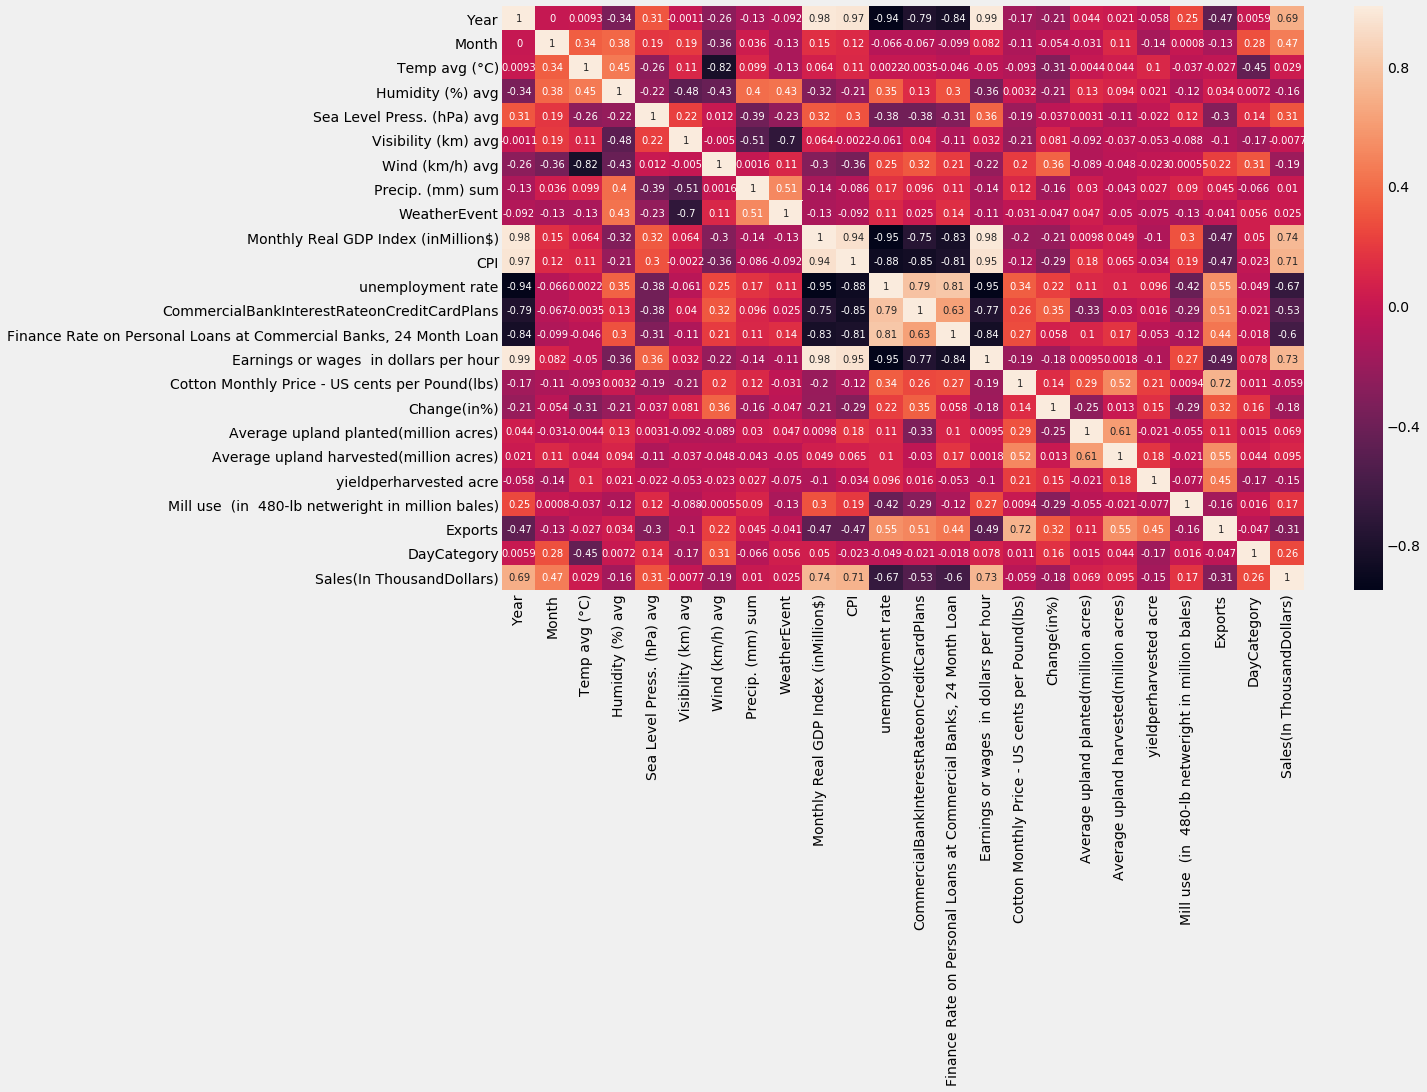

In [261]:
plt.figure(figsize=(16,10))
sns.heatmap(sales_women_reg_2015.corr(), annot=True,annot_kws={"size":10})
plt.show()

Insights from the plot -
1. Sales has high positive correlation with Monthly GDP Index,CPI  and Earnings per hour
2. Sales has considerable negative correlation with Unemployement rate and Interest rate on credit cards

# Model Building - Regression

#### Train - Validation -Test Split

Decouple Target variable from the data

In [262]:
X = sales_women_reg_2015.drop('Sales(In ThousandDollars)',axis=1)
y = sales_women_reg_2015["Sales(In ThousandDollars)"]

In [263]:
print(y.shape)
print(X.shape)

(84,)
(84, 23)


In [264]:
X.head()

,Year,Month,Temp avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent,Monthly Real GDP Index (inMillion$),...,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports,DayCategory
0,2009,1,-2.096774,57.354839,1015.967742,14.000000,12.000000,2.443226,10,14407.053343,...,11.44,22.05,57.70,4.02,9.296,7.559,799,4.17,11.550,2.0
1,2009,2,2.785714,54.000000,1017.071429,15.178571,12.214286,0.781071,6,14366.176571,...,11.05,22.22,55.21,-4.32,9.296,7.559,799,3.87,11.100,2.0
2,2009,3,5.967742,57.064516,1021.064516,14.258065,11.387097,1.434194,10,14351.786822,...,11.05,22.22,51.50,-6.72,9.296,7.559,799,3.72,11.650,0.0
3,2009,4,12.733333,55.700000,1014.533333,14.066667,11.366667,3.971667,12,14351.601731,...,11.05,22.13,56.78,10.25,9.296,7.559,787,3.62,12.225,1.0
4,2009,5,17.000000,68.516129,1017.161290,12.451613,8.000000,4.236129,14,14368.123959,...,11.25,22.04,61.95,9.11,9.297,7.400,803,3.52,12.300,2.0


Train Data

In [265]:
###X_train = X[X['Year'] != 2015]
X_train = X
X_train.shape

(84, 23)

Validation data

In [266]:
X_val = X[X['Year'] == 2015]
X_val.shape

(12, 23)

In [92]:
X_val

,Year,Month,Temp avg (°C),Humidity (%) avg,Sea Level Press. (hPa) avg,Visibility (km) avg,Wind (km/h) avg,Precip. (mm) sum,WeatherEvent,Monthly Real GDP Index (inMillion$),...,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Mill use (in 480-lb netweright in million bales),Exports,DayCategory
72,2015,1,-1.032258,53.645161,1019.387097,13.032258,11.677419,4.284839,11,16319.786314,...,10.47,24.88,67.35,-1.39,10.845,9.518,760,3.775,9.450,2.0
73,2015,2,-4.250000,53.892857,1017.607143,13.428571,11.750000,1.851786,11,16400.926737,...,9.85,25.05,69.84,3.70,10.845,9.518,781,3.625,10.200,2.0
74,2015,3,3.516129,54.000000,1019.032258,12.935484,9.838710,3.868065,16,16329.523792,...,9.85,25.04,69.35,-0.70,10.845,9.518,781,3.625,10.250,0.0
75,2015,4,12.533333,50.866667,1015.133333,14.700000,10.433333,1.761000,8,16427.136671,...,9.85,24.94,71.70,3.39,10.845,9.518,794,3.625,10.250,2.0
76,2015,5,20.483871,56.709677,1020.290323,14.032258,6.806452,1.524839,6,16434.482376,...,9.69,24.88,72.86,1.62,10.845,9.157,826,3.625,10.300,2.0
77,2015,6,21.866667,65.033333,1014.866667,13.100000,7.533333,4.022667,14,16521.301886,...,9.69,24.77,72.35,-0.70,9.399,8.451,797,3.775,10.150,1.0
78,2015,7,26.129032,59.096774,1012.741935,14.161290,5.483871,3.262581,9,16475.999854,...,9.69,24.83,72.35,0.00,8.850,8.353,807,3.725,10.250,2.0
79,2015,8,26.322581,54.870968,1015.225806,15.354839,5.903226,1.925484,5,16505.537615,...,9.80,25.04,71.82,-0.73,8.750,7.749,784,3.675,9.475,0.0
80,2015,9,23.700000,58.633333,1018.300000,14.766667,7.033333,2.777333,5,16601.489879,...,9.80,25.05,68.74,-4.29,8.398,8.012,777,3.675,9.700,1.0
81,2015,10,14.483871,57.032258,1018.935484,15.161290,8.451613,3.203871,7,16540.859723,...,9.80,25.14,69.03,0.42,8.398,8.012,772,3.675,9.700,2.0


Train data -Target

In [267]:
y_train = y.iloc[0:84] #y_train = y.iloc[0:72]
y_train.shape

(84,)

Validation data - Target

In [269]:
y_val = y.iloc[72:84]
y_val

72    3041.0
73    3646.0
74    4294.0
75    4353.5
76    4413.0
77    3899.0
78    3817.0
79    3897.0
80    3881.0
81    4372.0
82    4401.0
83    5874.0
Name: Sales(In ThousandDollars), dtype: float64

#### Test Data

In [270]:
X_test = sales_women_reg[sales_women_reg['Year'] == 2016]
X_test.drop(['Sales(In ThousandDollars)'],axis=1,inplace=True)

In [271]:
X_test.shape

(12, 23)

##  Linear Regression Model

#### Function to calculate the error metric - MAPE

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Build and Fit the Linear Regression Model

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
y_pred_train_lr = linearreg.predict(X_train)
y_pred_val_lr   = linearreg.predict(X_val)
y_pred_test_lr  = linearreg.predict(X_test)

In [274]:
mape_train_lr = mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_val_lr   = mean_absolute_percentage_error(y_val, y_pred_val_lr)
print(mape_train_lr)
print(mape_val_lr)

8.022210436741702
6.955714137710232


In [275]:
y_pred_test_lr

array([3637.34150349, 4219.37177933, 4005.48227991, 4193.55511294,
       4082.26939598, 4255.38026934, 4609.50863217, 4664.70237707,
       4804.12014233, 5040.41796211, 5671.53669196, 6224.6535935 ])

In [102]:
submission = pd.read_csv("SampleSubmission.csv")

In [105]:
submission['Sales(In ThousandDollars)'] = y_pred_test_lr
submission.to_csv("submission_lr.csv",index=False)

## Random Forest Model

In [276]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [277]:
print(rf.feature_importances_)

[0.00214896 0.16017249 0.03528034 0.00858821 0.00898628 0.00575151
 0.00958284 0.00589387 0.02161626 0.35817402 0.1026589  0.06440437
 0.00300389 0.01307931 0.07447392 0.02993051 0.01036176 0.00690072
 0.00896385 0.00971601 0.00501604 0.01032491 0.04497102]


In [278]:
feature_importances = pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['importance'])
feature_importances.sort_values('importance',ascending=False)

,importance
Monthly Real GDP Index (inMillion$),0.358174
Month,0.160172
CPI,0.102659
Earnings or wages in dollars per hour,0.074474
unemployment rate,0.064404
DayCategory,0.044971
Temp avg (°C),0.035280
Cotton Monthly Price - US cents per Pound(lbs),0.029931
WeatherEvent,0.021616
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",0.013079


In [279]:
y_pred_train_rf = rf.predict(X_train)
y_pred_val_rf   = rf.predict(X_val)
y_pred_test_rf  = rf.predict(X_test)

In [280]:
mape_train_rf = mean_absolute_percentage_error(y_train,y_pred_train_rf)
mape_val_rf = mean_absolute_percentage_error(y_val, y_pred_val_rf)
print(mape_train_rf)
print(mape_val_rf)

3.5228437338078193
3.103519734434261


In [281]:
y_pred_test_rf

array([4057.97 , 4099.28 , 4222.095, 4221.89 , 4322.355, 3910.465,
       4001.46 , 3998.835, 4031.83 , 4330.19 , 4489.04 , 4986.035])

In [112]:
submission['Sales(In ThousandDollars)'] = y_pred_test_rf
submission.to_csv("submission_rf.csv",index=False)

## Random Forest Randomized Cross Validation

In [282]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
rf_cv = RandomForestRegressor()
param_grid = {'max_leaf_nodes': np.arange(5,100,2),
             'min_samples_split': np.arange(0.001,0.1,0.001),
             'max_depth':np.arange(5,50,1),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch = RandomizedSearchCV(estimator=rf_cv, param_distributions=param_grid,n_iter=500)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=500, n_jobs=1,
          param_distributions={'max_leaf_nodes': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
       73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]), 'min_samples_split': array([0.001, 0.002, ...,...
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [283]:
rsearch.best_params_, 

({'min_weight_fraction_leaf': 0.034999999999999996,
  'min_samples_split': 0.056,
  'max_leaf_nodes': 73,
  'max_depth': 22},)

In [284]:
y_pred_train_rf_cv = rsearch.predict(X_train)
y_pred_val_rf_cv   = rsearch.predict(X_val)
y_pred_test_rf_cv  = rsearch.predict(X_test)

In [285]:
mape_train_rf_cv = mean_absolute_percentage_error(y_train,y_pred_train_rf_cv)
mape_val_rf_cv   = mean_absolute_percentage_error(y_val, y_pred_val_rf_cv)
print(mape_train_rf_cv)
print(mape_val_rf_cv)

5.071334541190152
3.395983205628614


In [286]:
y_pred_test_rf_cv

array([4107.69      , 4259.16666667, 4272.58333333, 4244.46      ,
       4368.74666667, 3887.10952381, 3815.68035714, 3886.53702381,
       3999.05666667, 4257.7675    , 4383.98416667, 5117.03916667])

In [118]:
submission['Sales(In ThousandDollars)'] = y_pred_test_rf_cv
submission.to_csv("submission_rf_cv.csv",index=False)

## XGBOOST Model

In [287]:
from xgboost import XGBRegressor
#modelxg = XGBRegressor(max_depth=5,min_child_weight=2, learning_rate=0.1,n_estimators=50,
#                       reg_alpha = 0.05,gamma=0.3, subsample = 0.9)

modelxg = XGBRegressor(max_depth=300, min_child_weight=3, learning_rate=0.001,n_estimators=3500,max_leaf_node =20,
                       colsample_bytree=0.5, random_sate= 42 , feed =1 ,subsample = 1 )


modelxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, feed=1, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=300, max_leaf_node=20,
       min_child_weight=3, missing=None, n_estimators=3500, n_jobs=1,
       nthread=None, objective='reg:linear', random_sate=42,
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [288]:
y_pred_train_xg = modelxg.predict(X_train)
y_pred_val_xg   = modelxg.predict(X_val)
y_pred_test_xg  = modelxg.predict(X_test)

In [289]:
mape_train_xg = mean_absolute_percentage_error(y_train,y_pred_train_xg)
mape_val_xg   = mean_absolute_percentage_error(y_val, y_pred_val_xg)
print(mape_train_xg)
print(mape_val_xg)

3.6877284999013735
4.227122197046485


In [290]:
y_pred_test_xg

array([3300.0015, 3653.6147, 4064.0923, 4089.8884, 4116.8184, 3827.388 ,
       3771.063 , 3796.2056, 3831.6577, 4079.7866, 4167.3154, 4642.947 ],
      dtype=float32)

In [291]:
submission['Sales(In ThousandDollars)'] = y_pred_test_xg
submission.to_csv("submission_xg.csv",index=False)

## Model Building - Time Series

#### Women Clothing

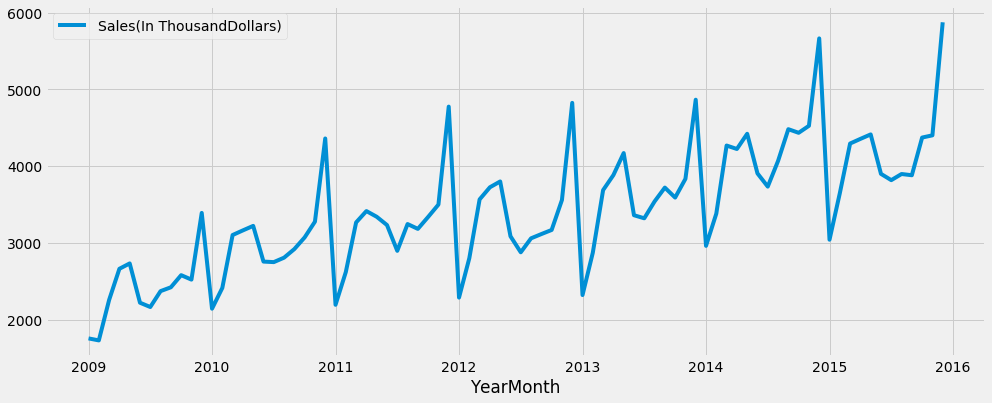

In [292]:
sales_women_time.plot(figsize=(15, 6))
plt.show()

#### Men clothing

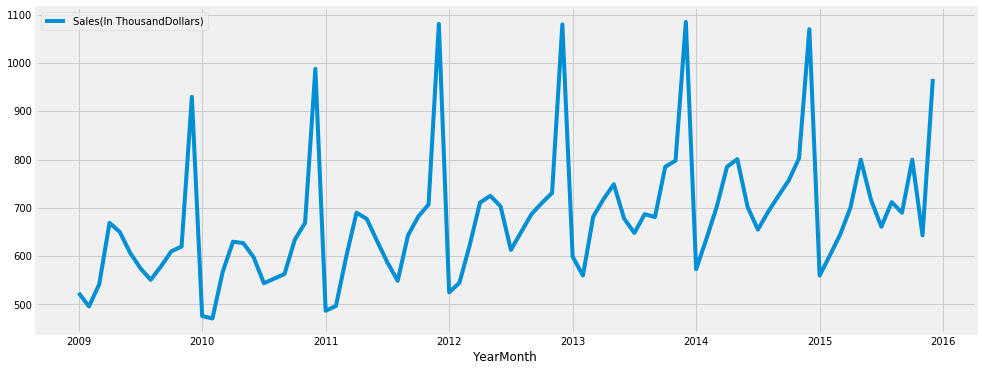

In [135]:
sales_men_time.plot(figsize=(15, 6))
plt.show()

#### Other Clothing

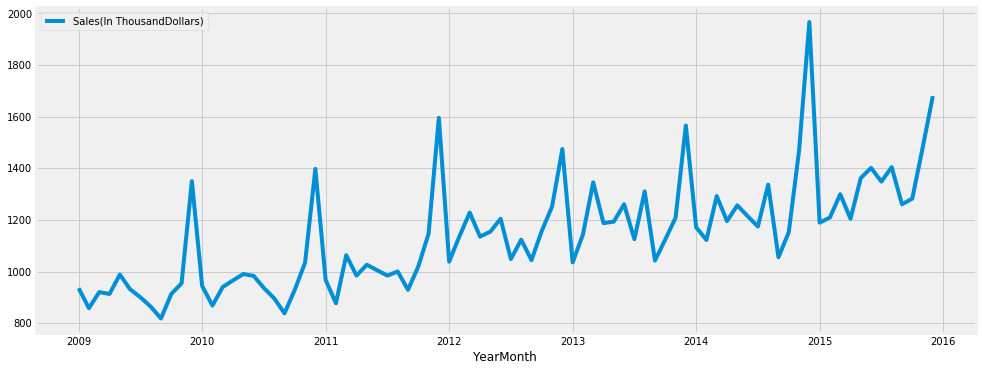

In [137]:
sales_other_time.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

#### Decomposition Plot - Men clothing

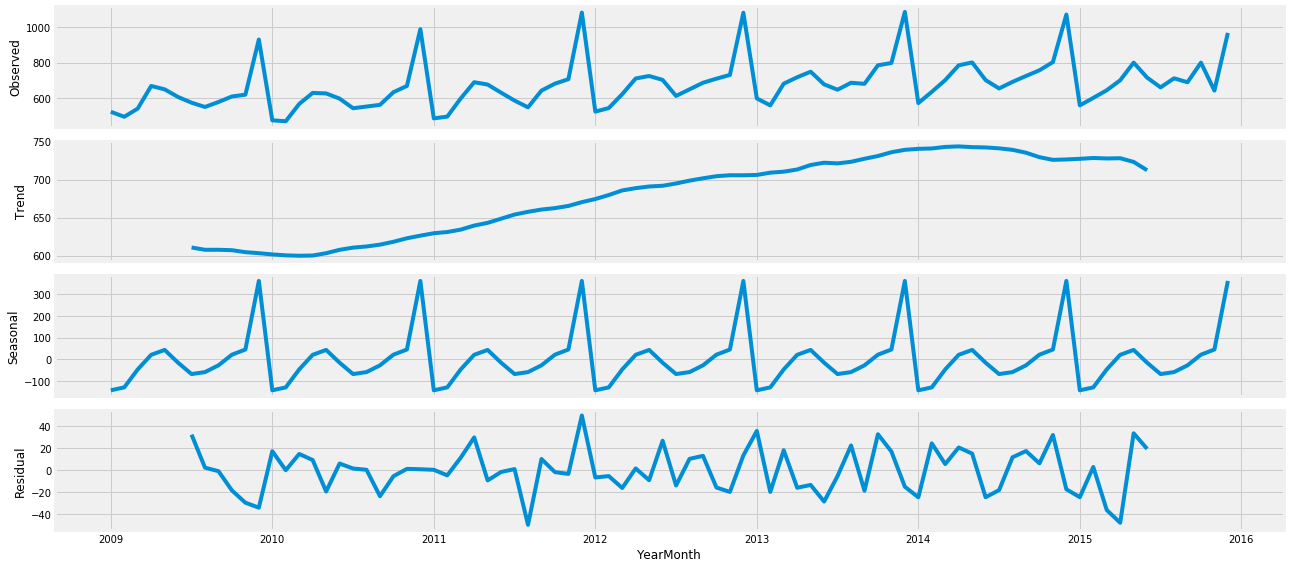

In [138]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sales_men_time, model='additive')
fig = decomposition.plot()
plt.show()

#### Decomposition plot - Women clothing

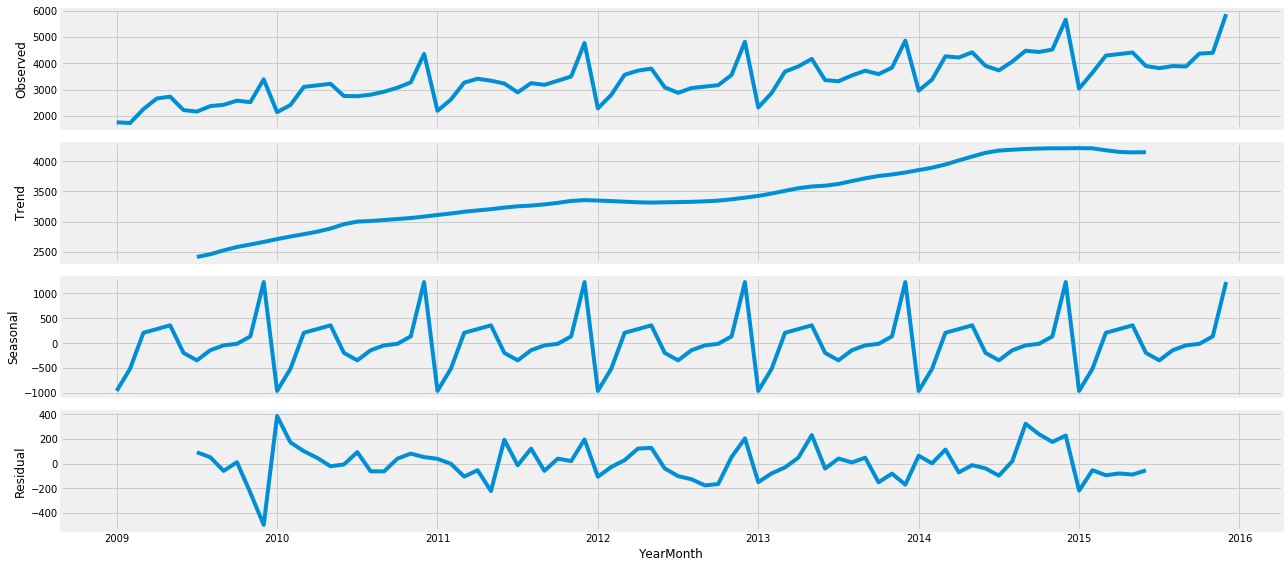

In [139]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sales_women_time, model='additive')
fig = decomposition.plot()
plt.show()

#### Decomposition plot - Other clothing

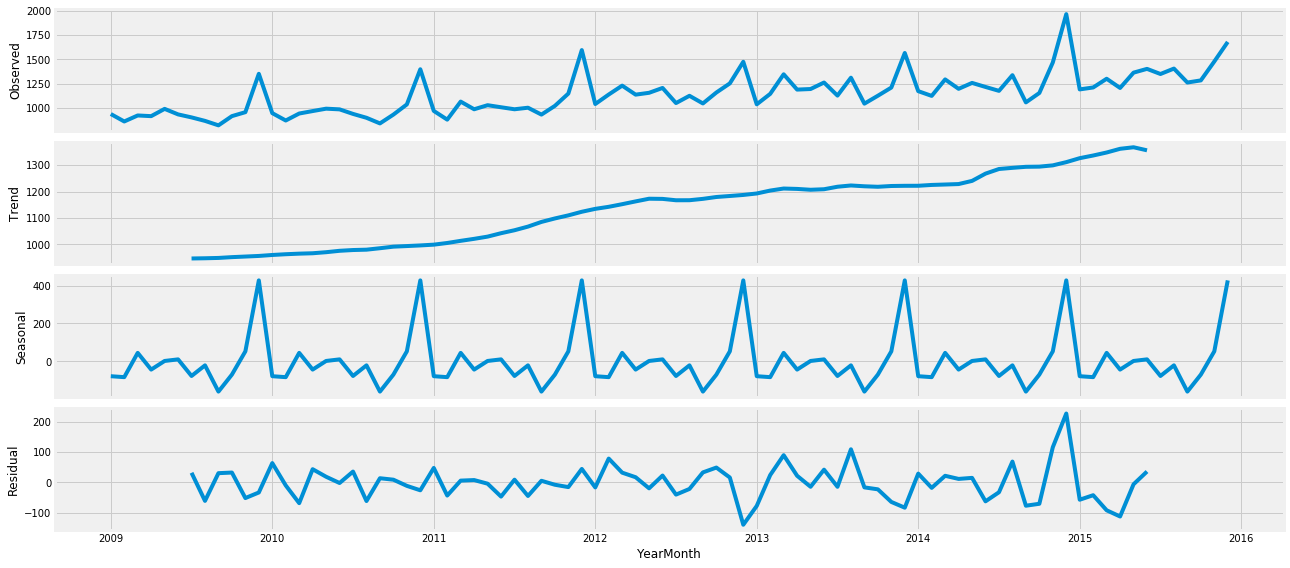

In [140]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sales_other_time, model='additive')
fig = decomposition.plot()
plt.show()

All the plots above clearly shows that the sales is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA


We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [141]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

### Model - Women clothing

In [142]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_women_time,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1593.5059725459078
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1288.605071651831
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1059.236521066103
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:857.0468289510455
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1038.2197435633564
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1014.4115655947785
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:870.7102414158036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:850.1831755369119
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.7682044456553
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1209.0536779948445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1009.5823423045325
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:826.6144521207663
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1016.0140230483928


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:982.3832338825831
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:853.2455242825183
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:820.6719177971544
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1323.5160633619614
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1081.1122129613827
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:973.9245253810029
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:797.585641025905
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:989.3919698352416
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:963.2259595429101
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:813.8158889696418
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:786.8119678324165
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1273.6861677953666
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1034.4763712542424
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:948.6500144936135
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:773.9797527947737
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:977.5469470736791
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:935.6477680493011
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:803.735113902289
ARIMA(0,

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1047.0246640448017
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:960.729842197061
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:787.368526826291
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:975.4713192355443
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:945.4929297213458
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:803.9288678293947
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:778.8333162249045
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1313.721564471443
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1072.2609860736218
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:964.0569671061642
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:787.8160547418885
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:965.331465036578
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:952.4997894340007
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:789.9031647490062
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:777.346589522571
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1275.227351887954
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1036.3433677984372
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:950.5634424297958
ARIMA(1, 1,

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 765.05. Therefore we should consider this to be optimal option.

#### Fitting the ARIMA model

In [143]:
mod = sm.tsa.statespace.SARIMAX(sales_women_time,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6555      0.302     -2.168      0.030      -1.248      -0.063
ma.L1          0.2740      0.355      0.772      0.440      -0.422       0.970
ar.S.L12       0.2677      0.054      4.990      0.000       0.163       0.373
ma.S.L12      -0.9998      0.196     -5.113      0.000      -1.383      -0.617
sigma2      2.463e+04   7.95e-06    3.1e+09      0.000    2.46e+04    2.46e+04


#### Validating forecasts

In [146]:
y_val_ts = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

In [147]:
y_pred_test_ts  = results.predict(start="2016-01-01",end="2016-12-01", dynamic=True)
y_pred_test_ts[0:12]

2016-01-01    3292.655146
2016-02-01    3911.861240
2016-03-01    4547.926650
2016-04-01    4689.777263
2016-05-01    4743.081686
2016-06-01    4245.104425
2016-07-01    4106.907113
2016-08-01    4285.009780
2016-09-01    4350.379873
2016-10-01    4585.675326
2016-11-01    4715.789818
2016-12-01    6017.581660
Freq: MS, dtype: float64

In [148]:
submission['Sales(In ThousandDollars)'][0:12] = y_pred_test_ts[0:12]
submission.to_csv("submission_ts.csv",index=False)

### Model - Men clothing

In [294]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_men_time,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1323.1034507244078
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1065.9851072992112
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:751.3750738954093
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:632.1033736586149
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:757.808182476129
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:748.3127201041842
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:641.8574897805372
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:633.8443306832762
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1232.8809044166528
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:990.2150099668846
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:733.8791222369362
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:617.0668666997187
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:761.0136949325181
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:729.6818866252555
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:636.3989856446922
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:618.3764514220615
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1080.8446046368235
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:870.0023969739119
ARIMA(0

The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 583.011. Therefore we should consider this to be optimal option.

In [295]:
mod = sm.tsa.statespace.SARIMAX(sales_men_time,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6764      0.123     -5.518      0.000      -0.917      -0.436
ma.S.L12      -0.5375      0.270     -1.988      0.047      -1.067      -0.008
sigma2      1432.2281    161.703      8.857      0.000    1115.295    1749.161


#### Validating forecasts

In [297]:
y_val_ts_men = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

In [298]:
y_pred_test_ts_men  = results.predict(start="2016-01-01",end="2016-12-01", dynamic=True)
y_pred_test_ts_men[0:12]

2016-01-01    513.543390
2016-02-01    545.509593
2016-03-01    611.104111
2016-04-01    676.242919
2016-05-01    730.290288
2016-06-01    652.377358
2016-07-01    601.027236
2016-08-01    640.042605
2016-09-01    644.471995
2016-10-01    722.759713
2016-11-01    666.854076
2016-12-01    975.171967
Freq: MS, dtype: float64

### Model - Other Clothing

In [299]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_other_time,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1409.1557078279116
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1138.4082472860532
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:877.014146041021
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:740.4440538231481
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:865.3378737998054
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:831.1225917061757
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:751.8798501870643
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:732.1624519022383
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1307.5553913862202
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1052.974044933704
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:847.3878137426645
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:714.2137495298066
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:868.7109002218654
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:817.3960741714548
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:736.5707144854692
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:710.7733689923193
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1106.450073711742
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:902.3735201741614
ARIMA(0,

The above output suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 672.115. Therefore we should consider this to be optimal option.

In [301]:
mod = sm.tsa.statespace.SARIMAX(sales_other_time,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2361      0.103      2.285      0.022       0.034       0.439
ma.L1         -1.0000      0.297     -3.365      0.001      -1.583      -0.417
ma.S.L12      -0.8225      0.285     -2.887      0.004      -1.381      -0.264
sigma2      5685.9392   5.23e-05   1.09e+08      0.000    5685.939    5685.939


#### Validating forecasts

In [303]:
y_val_ts_other = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

In [304]:
y_pred_test_ts_other  = results.predict(start="2016-01-01",end="2016-12-01", dynamic=True)
y_pred_test_ts_men[0:12]

2016-01-01    513.543390
2016-02-01    545.509593
2016-03-01    611.104111
2016-04-01    676.242919
2016-05-01    730.290288
2016-06-01    652.377358
2016-07-01    601.027236
2016-08-01    640.042605
2016-09-01    644.471995
2016-10-01    722.759713
2016-11-01    666.854076
2016-12-01    975.171967
Freq: MS, dtype: float64

# Validation & Parameter Tuning

#### Validation

We have used the data from 2009 to 2015 as the test data and validated the model on the 2015 data and finally used the model to predict the values of 2016.

This was done because we have very less data of just 7 years for train and validation and also there are considerable variations in 2015 compared to 2014.

So, if we miss this in the train , model may not optimal to predict the values .

Also, this is a series data so it would be better to split the data like this rather than going for random split.

#### Parameter Tuning

In parameter tuning, I have used random search Cross validation in the Random Forest model and it has reduced the error slightly compared to basic Random Forest Model.

Paramters Tuned : 'max_leaf_nodes': np.arange(5,100,2),
                  'min_samples_split': np.arange(0.001,0.1,0.001),
                  'max_depth':np.arange(5,50,1),
                  'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)
                  'n_iter': 500

In XGBOOST , did rigorous parameter tuning of the hyper parameters and hence this model gave the best predictions out of all the models.

Parameter Tuned :      max_depth=300, min_child_weight=3, learning_rate=0.001,n_estimators=3500,max_leaf_node =20,
                       colsample_bytree=0.5, random_sate= 42 , feed =1 ,subsample = 1
                       
Time Series : P,D,Q values are tuned to get the lowest AIC values

Women clothing  Order(0,1,1), Seasonal Order(1,1,1,12)
Men clothing    Order(0,1,1), Seasonal Order(0,1,1,12) 
Other clothing  Order(1,1,1), Seasonal Order(0,1,1,12)

# Summary 

Read the data, visualized the data , explored insights , preprocessed the data to make it compatible ith other relevant data.

Finally splitted the data and built different models to predict the revenue of women category clothing in the year 2016.

MAPE is considered as the error metric because, since the values represents the percentage of the error over the period of one year, its self-explanatory and easy to explain to the business.

All the other metrics, which we use normally for regression like RMSE,MAE don't give the percent and will be difficult to the business to understand.

    Model            Train MAPE  Val MAPE  Test MAPE

1. Linear Regression------------ 8.02--------6.95---------15.61
2. Random Forest---------------- 3.52--------3.10---------13.63
3. Random Forest CV------------5.7----------3.39---------11.62
4. XGBoost--------------------------3.68--------4.22---------8.36
5. Time Series----------------------8.76--------9.62---------12.42

We could have asked for more data from the business for better predictions as the data provided is very less.

Also, since we have used interpolate to fill the missing values , asking them for the correct values may increase the predictions.

# Conclusion

Recommendation to business is to use <B>XGBOOST</B> model to predict the revenue of the year 2016 and plan accordingly.

This will help them in better strategy and execution.

